<a href="https://colab.research.google.com/github/ThanhQuyen1/ML/blob/main/DM_GK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import plotly.express as px

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/DM_Ca2/GK'

Mounted at /content/gdrive
/content/gdrive/MyDrive/DM_Ca2/GK


In [3]:
df = pd.read_csv('breast-cancer.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [7]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [8]:
px.histogram(data_frame=df,x=df.area_mean,color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [9]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [10]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [11]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [12]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [13]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [14]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [15]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [16]:
df.drop('id', axis=1, inplace=True)

In [17]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [18]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
corr = df.corr()

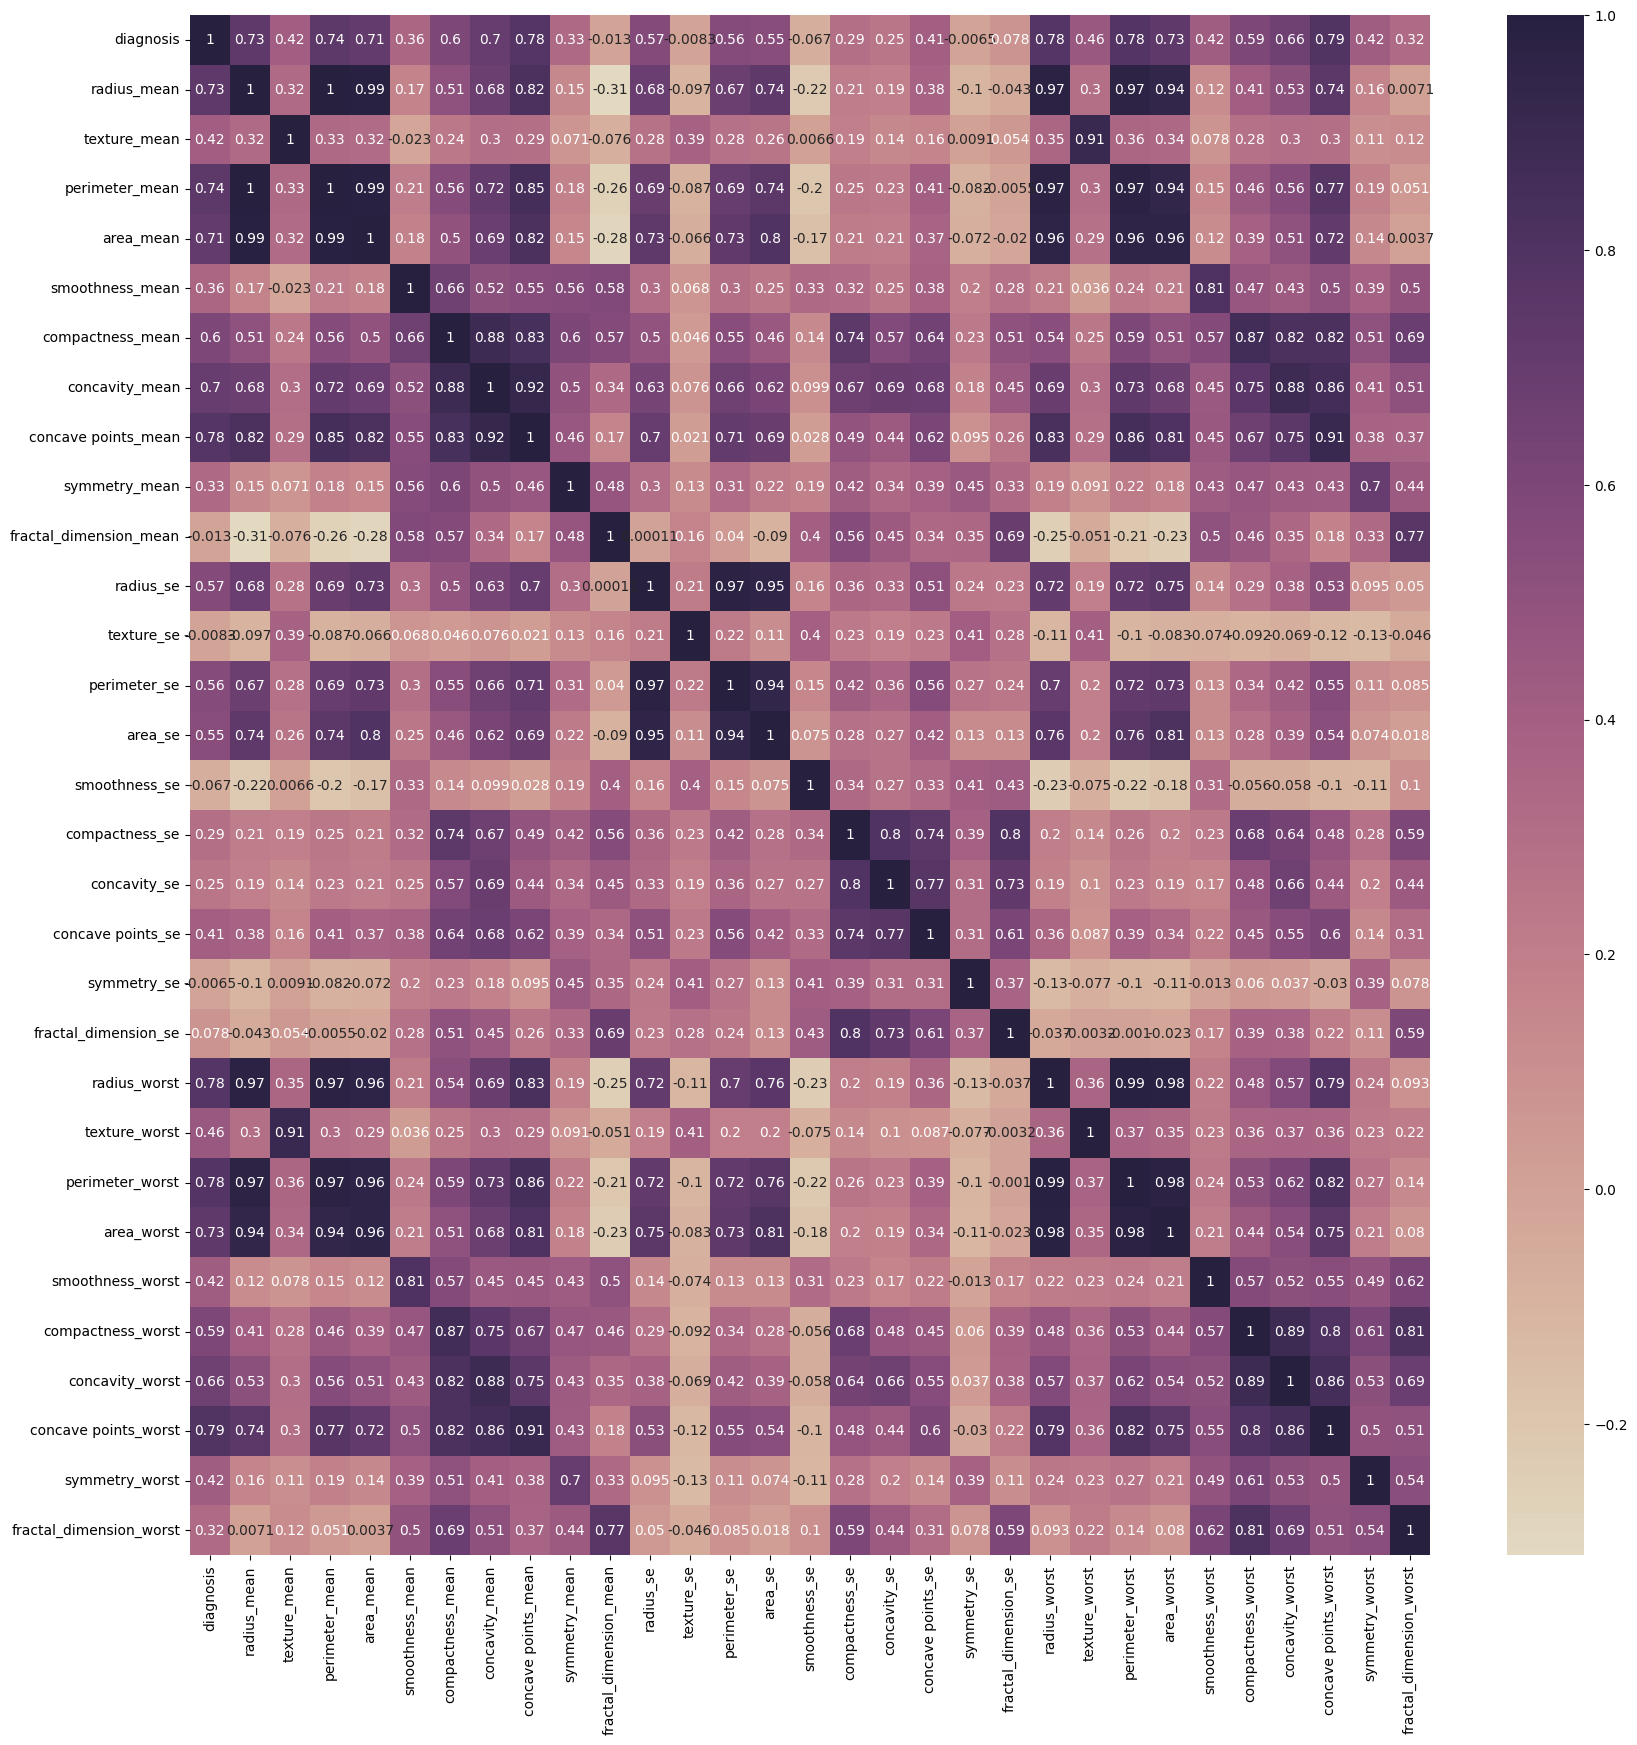

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('diagnosis')

In [21]:
X = df[names]
y = df['diagnosis']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

scaler.transform(X_train) #transform training data
scaler.transform(X_test) #transform validation data

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [23]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test):
    '''
    Keyword arguments:
    X -- Training data
    y -- Traing labels

    returns a dataframe for evaluating metrics
    '''

    model.fit(X_train, y_train)  #fit the model instance


    predictions = model.predict(X_test) # calculate predictions
#compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

LogisticRegression

In [24]:
lg = LogisticRegression()

results = train_evaluate_model(lg, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [25]:
results.index = ['LogisticRegression']

In [26]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074


Decision Tree

In [27]:
decision_tree = DecisionTreeClassifier()
decision_tree_results = train_evaluate_model(decision_tree,X_train, y_train, X_test, y_test)

decision_tree_results.index = ['DecisionTree']

results = pd.concat([results, decision_tree_results])

In [28]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863


KNearestNeighbors

In [29]:
KNN = KNeighborsClassifier(n_neighbors=12)

In [30]:
knn = train_evaluate_model(KNN, X_train, y_train, X_test, y_test)
knn.index =['KNearsNeighbors']
results = pd.concat([results, knn])

In [31]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863


RandomForestClassifer

In [32]:
rfc = RandomForestClassifier()

In [33]:
rfc_result = train_evaluate_model(rfc, X_train, y_train, X_test, y_test)
rfc_result.index = ['RandomForest']

results = pd.concat([results, rfc_result])

In [34]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863


XGBoost

In [35]:
xgboost = xgb.XGBClassifier()
xgboost_result = train_evaluate_model(xgboost, X_train, y_train, X_test, y_test)
xgboost_result.index = ['XGBoost']

results = pd.concat([results, xgboost_result])

In [36]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863


Naive Bayes

In [37]:
Naive_Bayes = GaussianNB()
Naive_Bayes_result = train_evaluate_model(Naive_Bayes, X_train, y_train, X_test, y_test)
Naive_Bayes_result.index = ['NaiveBayes']

results = pd.concat([results, Naive_Bayes_result])

In [38]:
results.head(6).sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
NaiveBayes,0.973684,0.963855,1.000000,0.930233,0.965116
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863


In [39]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
NaiveBayes,0.973684,0.963855,1.000000,0.930233,0.965116
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863


Neural Network

In [40]:
initializer = tf.keras.initializers.RandomNormal(seed=0)
def scheduler(epoch, lr):

    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler) # set the callback to our scheduler function

inputs = Input(shape=(X.shape[-1],))
x= Dense(16,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(inputs)
x = Dropout(0.4)(x)
x= Dense(16,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(inputs)
x = Dropout(0.4)(x)
x = Dense(25,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(x)
x = Dense(1, activation='sigmoid',kernel_initializer=tf.keras.initializers.RandomNormal())(x)
model = Model(inputs=inputs, outputs=x)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=140)
predictions = model.predict(X_test)

Epoch 1/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.4225 - loss: 0.7740
Epoch 2/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4714 - loss: 0.6824 
Epoch 3/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5541 - loss: 0.6457 
Epoch 4/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7300 - loss: 0.6091 
Epoch 5/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7028 - loss: 0.5839 
Epoch 6/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7908 - loss: 0.5335 
Epoch 7/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7713 - loss: 0.5002 
Epoch 8/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7702 - loss: 0.4905 
Epoch 9/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8268 - loss: 0.4202
Epoch 10/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8464 - loss: 0.3938
Epoch 11/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8096 - loss: 0.4199 
Epoch 12/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [41]:
# Generate binary predictions for the test data using the trained neural network model
predictions = model.predict(X_test)
# convert predicted probabilities to binary predictions Note that a threshold of 0.4 was used as recall is more important for medical diagnosis
predictions = (predictions > 0.4)

# Calculate evaluation metrics using the binary predictions and true labels for the test data
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
balanced_accuracy = balanced_accuracy_score(y_test, predictions)

# Create a pandas dataframe containing the evaluation metric values as a single row
nn_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]],
                     columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [42]:
nn_df.index = ['NeuralNetwork']


In [43]:
results = pd.concat([results, nn_df])

In [44]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
NaiveBayes,0.973684,0.963855,1.000000,0.930233,0.965116
NeuralNetwork,0.973684,0.963855,1.000000,0.930233,0.965116
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863


**Multi-Layer Perceptron**

In [45]:
MLP_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [46]:
MLP_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
MLP_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.4146 - loss: 97.4681 - val_accuracy: 0.6228 - val_loss: 44.3009
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5174 - loss: 32.8285 - val_accuracy: 0.3772 - val_loss: 9.0065
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5464 - loss: 21.5203 - val_accuracy: 0.8158 - val_loss: 3.8559
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6564 - loss: 9.9244 - val_accuracy: 0.9123 - val_loss: 1.3743
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6942 - loss: 9.6651 - val_accuracy: 0.9298 - val_loss: 0.6944
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7042 - loss: 7.8242 - val_accuracy: 0.8947 - val_loss: 2.0369
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7471 - loss: 5.3080 - val_accuracy: 0.9211 - val_loss: 0.6081
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6921 - loss: 5.3133 - val_accuracy: 0.89

In [48]:
MLP_Predictions = MLP_model.predict(X_test)
MLP_Predictions = (MLP_Predictions > 0.4)

accuracy = accuracy_score(y_test, MLP_Predictions)
f1 = f1_score(y_test, MLP_Predictions)
precision = precision_score(y_test, MLP_Predictions)
recall = recall_score(y_test, MLP_Predictions)
balanced_accuracy = balanced_accuracy_score(y_test, MLP_Predictions)

MLP_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]],
                     columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [49]:
MLP_df.index = ['MLP']


In [50]:
results = pd.concat([results, MLP_df])

In [51]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
NaiveBayes,0.973684,0.963855,1.000000,0.930233,0.965116
NeuralNetwork,0.973684,0.963855,1.000000,0.930233,0.965116
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
MLP,0.938596,0.921348,0.891304,0.953488,0.941533
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863


**Trying all Features**





As a means of verifying the validity of our approach, we will try utilizing all available features in our analysis

In [52]:
X_all_features = df.drop('diagnosis',axis=1)
X_train_all_features, X_test_all_features, y_train, y_test = train_test_split(X_all_features, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

In [53]:
LogisticRegression_all_features = train_evaluate_model(lg, X_train_all_features, y_train, X_test_all_features, y_test)

LogisticRegression_all_features.index = ['LogisticRegression_all_features']
results = pd.concat([results, LogisticRegression_all_features])

DecisionTree_all_features = train_evaluate_model(decision_tree, X_train_all_features, y_train, X_test_all_features, y_test)
DecisionTree_all_features.index = ['DecisionTree_all_features']
results = pd.concat([results, DecisionTree_all_features])


KNearsNeighbors_all_features =  train_evaluate_model(KNN, X_train_all_features, y_train, X_test_all_features, y_test)

KNearsNeighbors_all_features.index = ['KNearsNeighbors_all_features']
results = pd.concat([results, KNearsNeighbors_all_features])

RandomForest_all_features = train_evaluate_model(rfc,X_train_all_features, y_train, X_test_all_features, y_test)

RandomForest_all_features.index = ['RandomForest_all_features']
results = pd.concat([results, RandomForest_all_features])


XGBoost_all_features = train_evaluate_model(xgboost,X_train_all_features, y_train, X_test_all_features, y_test)

XGBoost_all_features.index = ['XGBoost_all_features']
results = pd.concat([results, XGBoost_all_features])


Naive_Bayes_all_features = train_evaluate_model(Naive_Bayes,X_train_all_features, y_train, X_test_all_features, y_test)
Naive_Bayes_all_features.index = ['Naive_Bayes_all_features']

# Change this line to use Naive_Bayes_all_features instead of Naive_Bayes_result
results = pd.concat([results, Naive_Bayes_all_features])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [54]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
NaiveBayes,0.973684,0.963855,1.000000,0.930233,0.965116
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
KNearsNeighbors_all_features,0.973684,0.963855,1.000000,0.930233,0.965116
Naive_Bayes_all_features,0.973684,0.963855,1.000000,0.930233,0.965116
NeuralNetwork,0.973684,0.963855,1.000000,0.930233,0.965116
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
XGBoost_all_features,0.956140,0.941176,0.952381,0.930233,0.951032
RandomForest_all_features,0.956140,0.941176,0.952381,0.930233,0.951032


**Evaluation**

In [55]:
models = results.T.columns.values
models= models[0:8]

In [56]:
models

array(['LogisticRegression', 'DecisionTree', 'KNearsNeighbors',
       'RandomForest', 'XGBoost', 'NaiveBayes', 'NeuralNetwork', 'MLP'],
      dtype=object)

In [57]:
fig = px.bar(x=results.iloc[:8,0].values, y =models,orientation='h',color=results['accuracy'].iloc[:8],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Accuracy'),
                 yaxis=dict(title="Models"))

fig.show()

In [58]:
fig = px.bar(x=results.iloc[:8,1].values, y =models,orientation='h',color=results['accuracy'].iloc[:8],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='F1_Score'),
                 yaxis=dict(title="Models"))

fig.show()

In [59]:
fig = px.bar(x=results.iloc[:8,2].values, y =models,orientation='h',color=results['precision'].iloc[:8],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Precision'),
                 yaxis=dict(title="Models"))

fig.show()

In [60]:
fig = px.bar(x=results.iloc[:8,3].values, y =models,orientation='h',color=results['recall'].iloc[:8],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Recall'),
                 yaxis=dict(title="Models"))

fig.show()

In [61]:
fig = px.bar(x=results.iloc[:8,4].values, y =models,orientation='h',color=results['balanced_accuracy'].iloc[:8],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Balanced Accuracy'),
                 yaxis=dict(title="Models"))

fig.show()


**Conclusion**

The Neural Network algorithm outperforms other algorithms in terms of recall and balanced accuracy.

Naive Bayes and K-Nearest Neighbors (KNN) algorithms perform similarly and achieve the highest precision scores.

Decision Tree is the only algorithm that performs better without feature selection.

Note that results may vary slightly between notebook runs because of random intialization